# Data Analysis Project: Bike Sharing Dataset
- **Name:** Marcel Aditya Pamungkas
- **Email:** marceladitya88@gmail.com
- **ID Dicoding:** marcelap

## Define Business Question

- Which year shows better performance on the total of bike rentals? What can be inferred about bike rentals in both 2011 and 2012?
- What is the effect of weather to the total of bike rentals in both 2011 and 2012?
- What is the correlation among temperature, humidity, and windspeed with the total of bike rentals?
- What season that has the highest and lowest total of bike rentals?
- What is the comparison between casual and registered user in the total of bike rentals?
- How do the days among weekdays, weekend, and holiday affect the total of bike rentals?

## Importing All Necessary Libraries

In [455]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Data Wrangling

###Gathering Data

The dataset is taken from Kaggle with the link is [here](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data). There are 2 files in csv format, so pandas library can be used to read the data.

1. Read the hour.csv data and save it to variable hours_df.

In [456]:
hours_df = pd.read_csv("Data/hour.csv")
print(hours_df.shape)
hours_df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Read the day.csv data and save it to variable days_df.

In [457]:
days_df = pd.read_csv("Data/day.csv")
print(days_df.shape)
days_df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###Assessing Data

####1. Assessing the hours_df table

In [458]:
# Checking the summary of the hours_df dataset
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [459]:
# Check if there is any missing value on hours_df
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [460]:
# Check if there is any duplicate value on hours_df
print(f"Total dupilcate values: {hours_df.duplicated().sum()}")

Total dupilcate values: 0


In [461]:
# Check the statistics of hours_df
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


From the results above, this means that there is no missing value and duplicate value on hours_df. However, there seems to be outliers on column casual, registered, and cnt. To check whether there are outliers, we will use boxplot to visualize.

<Axes: xlabel='casual'>

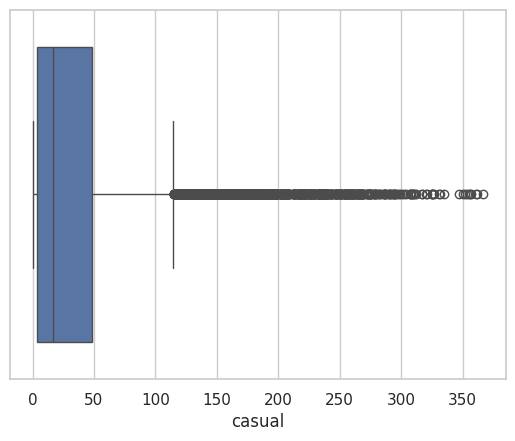

In [462]:
# Visualizing column casual to check for outliers using boxplot
sns.boxplot(x = hours_df["casual"])

<Axes: xlabel='registered'>

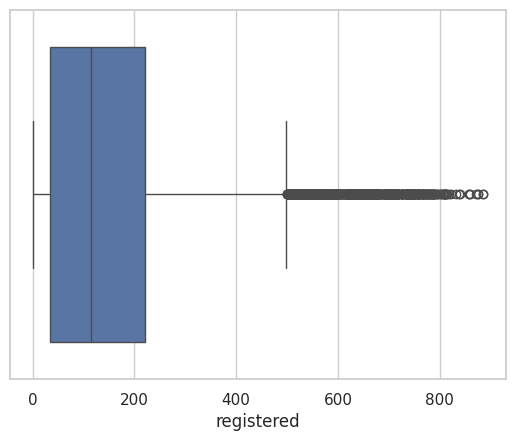

In [463]:
# Visualizing column casual to check for outliers using boxplot
sns.boxplot(x = hours_df["registered"])

<Axes: xlabel='cnt'>

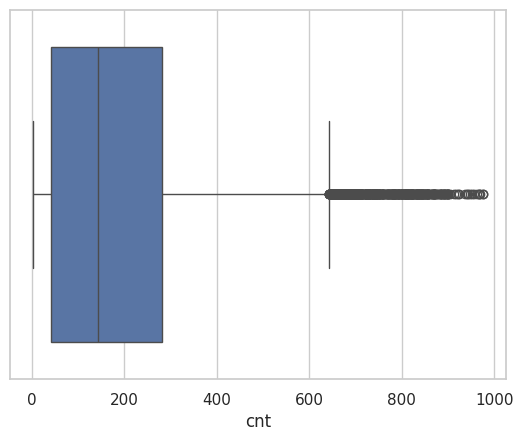

In [464]:
# Visualizing column casual to check for outliers using boxplot
sns.boxplot(x = hours_df["cnt"])

After checking for outliers using boxplot, it can be inferred that column casual, registered, and cnt have outliers.

####2. Assessing the days_df table

In [465]:
# Checking the summary of the days_df dataset
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [466]:
# Check if there is any missing value on days_df
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [467]:
# Check if there is any duplicate value on days_df
print(f"Total dupilcate values: {days_df.duplicated().sum()}")

Total dupilcate values: 0


In [468]:
# Check the statistics of days_df
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


From the results above, this means that there is no missing value and duplicate value on days_df. However, there seems to be outliers on column casual, registered, and cnt. To check whether there are outliers, we will use boxplot to visualize.

<Axes: xlabel='casual'>

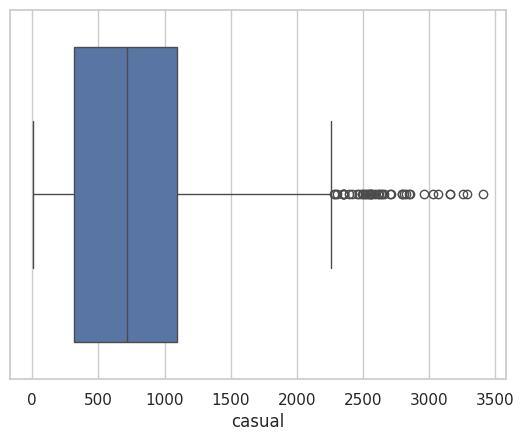

In [469]:
# Visualizing column casual to check for outliers using boxplot
sns.boxplot(x = days_df["casual"])

<Axes: xlabel='registered'>

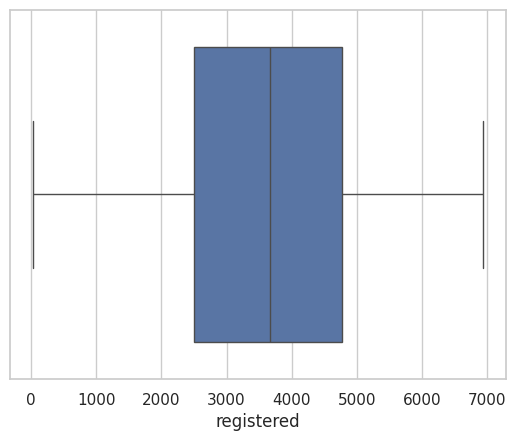

In [470]:
# Visualizing column casual to check for outliers using boxplot
sns.boxplot(x = days_df["registered"])

<Axes: xlabel='cnt'>

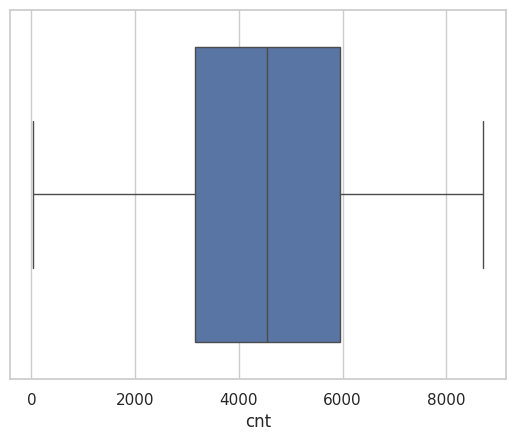

In [471]:
# Visualizing column casual to check for outliers using boxplot
sns.boxplot(x = days_df["cnt"])

After checking for outliers using boxplot, it can be inferred that column casual has outliers.

####3. Summary of Assessing Data

To summarize what happens during assessing the data, here is the recap:
1. Both hour and day datasets don't have missing values and duplicates.
2. In hour dataset, there are 3 columns that have outliers, which are column casual, registered, and cnt.
3. In day dataset, there is 1 column that has outliers, which is column casual.

###Cleaning Data

####1. Cleaning the Hour Dataset

A. For better reading, we will rename some of the columns in the hour dataset.

In [472]:
# Changing the column names
column_mapping = {
    "dteday": "date", "yr": "year", "mnth" : "month", "hr": "hour", "weathersit": 'weather_category',
    "temp": "temperature", "hum": "humidity", "cnt": "count"
}
# Use the rename method to rename the columns
hours_df.rename(columns = column_mapping, inplace = True)
hours_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_category,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In the kaggle, it is also mentioned what is the meaning of the number in column season, year, month, weekday, workingday, and weather_category. To make the data easier to understand, we will change the number in the data into the meaning.

In [473]:
hours_df["season"] = hours_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

hours_df["year"] = hours_df["year"].map({0: "2011", 1: "2012"})

hours_df["month"] = hours_df["month"].map({
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
})

hours_df["weekday"] = hours_df["weekday"].map({
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
})

hours_df["workingday"] = hours_df["workingday"].map({0: "Workday", 1: "Holiday/Weekend"})

hours_df["weather_category"] = hours_df["weather_category"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
})

Changing number into string means that the datatype is also changed. We change the datatype from int64 into category.

In [474]:
hours_df["date"] = pd.to_datetime(hours_df.date)
hours_df["season"] = hours_df.season.astype("category")
hours_df["year"] = hours_df.year.astype("category")
hours_df["month"] = hours_df.month.astype("category")
hours_df["holiday"] = hours_df.holiday.astype("category")
hours_df["weekday"] = hours_df.weekday.astype("category")
hours_df["workingday"] = hours_df.workingday.astype("category")
hours_df["weather_category"] = hours_df.weather_category.astype("category")
hours_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_category,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,Workday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,Workday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,Workday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,Workday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,Workday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


B. To handle the outliers, we will use the Interquartile Range method.

In [475]:
# Handling outliers for the casual attribute

# Calculate Q1, Q3 and IQR
Q1 = hours_df["casual"].quantile(0.25)
Q3 = hours_df["casual"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with casual outside of the acceptable range
hours_df = hours_df[
    (hours_df["casual"] >= lower_bound) & (hours_df["casual"] <= upper_bound)
]

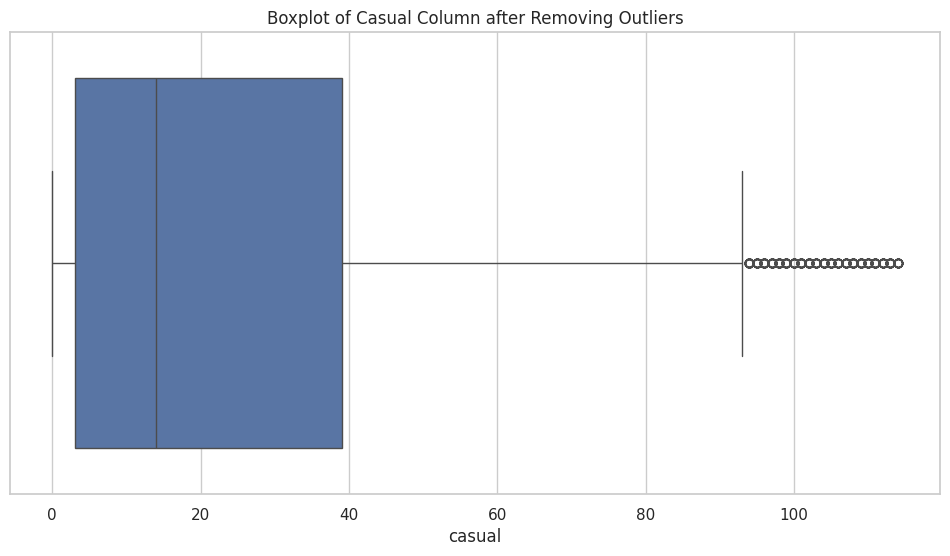

In [476]:
# Visualizing column casual using boxplot after removing the outliers
plt.figure(figsize = (12, 6))
sns.boxplot(x = hours_df["casual"])
plt.title("Boxplot of Casual Column after Removing Outliers")
plt.show()

In [477]:
# Check the statistics of column casual in hours_df after removing the outliers
hours_df["casual"].describe()

count    16187.000000
mean        25.058442
std         27.542664
min          0.000000
25%          3.000000
50%         14.000000
75%         39.000000
max        114.000000
Name: casual, dtype: float64

In [478]:
# Handling outliers for the registered attribute

# Calculate Q1, Q3 and IQR
Q1 = hours_df["registered"].quantile(0.25)
Q3 = hours_df["registered"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with registered outside of the acceptable range
hours_df = hours_df[
    (hours_df["registered"] >= lower_bound) & (hours_df["registered"] <= upper_bound)
]

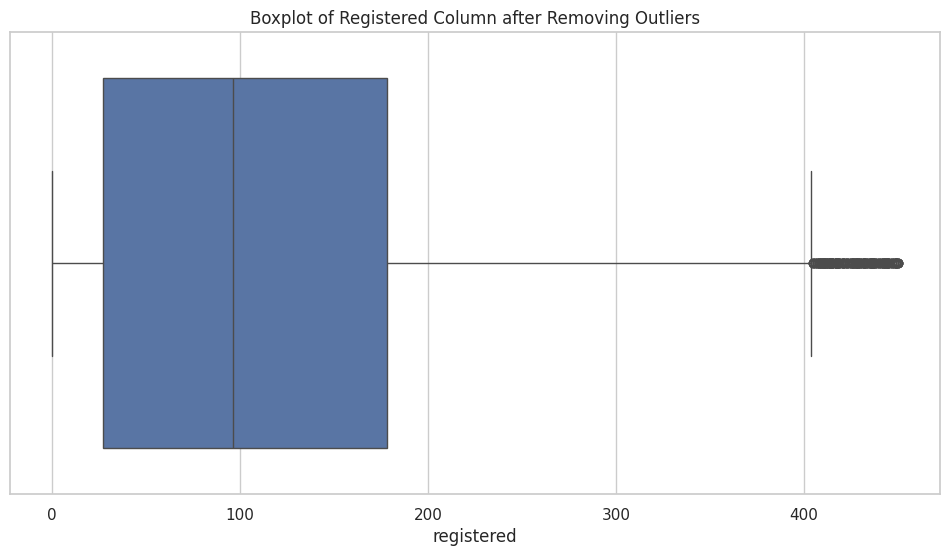

In [479]:
# Visualizing column registered using boxplot after removing the outliers
plt.figure(figsize = (12, 6))
sns.boxplot(x = hours_df["registered"])
plt.title("Boxplot of Registered Column after Removing Outliers")
plt.show()

In [480]:
# Check the statistics of registered casual in hours_df after removing the outliers
hours_df["registered"].describe()

count    15300.000000
mean       117.977582
std        104.603001
min          0.000000
25%         27.000000
50%         96.000000
75%        178.000000
max        450.000000
Name: registered, dtype: float64

In [481]:
# Handling outliers for the count attribute

# Calculate Q1, Q3 and IQR
Q1 = hours_df["count"].quantile(0.25)
Q3 = hours_df["count"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'count' outside of the acceptable range
hours_df = hours_df[
    (hours_df["count"] >= lower_bound) & (hours_df["count"] <= upper_bound)
]

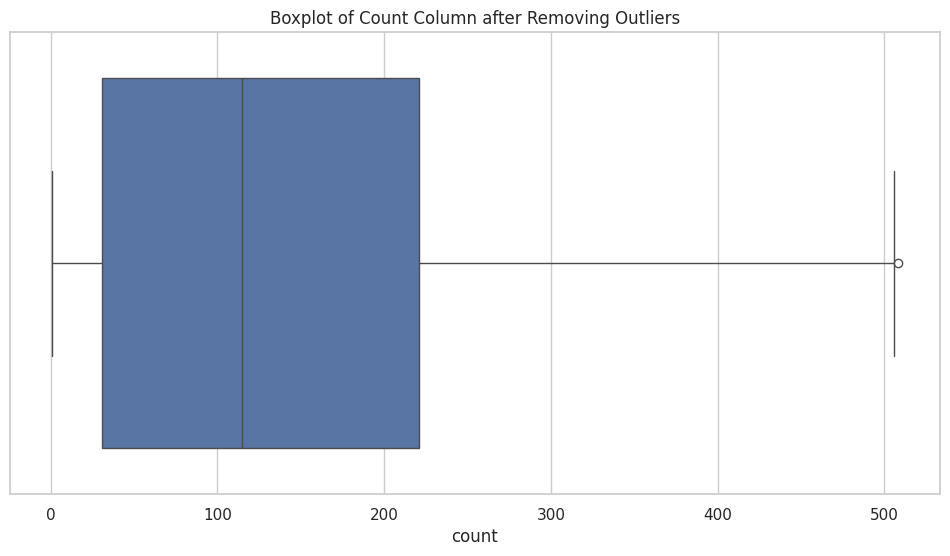

In [482]:
# Visualizing column count using boxplot after removing the outliers
plt.figure(figsize = (12, 6))
sns.boxplot(x = hours_df["count"])
plt.title("Boxplot of Count Column after Removing Outliers")
plt.show()

In [483]:
# Check the statistics of registered casual in hours_df after removing the outliers
hours_df["count"].describe()

count    15265.000000
mean       140.414085
std        121.015260
min          1.000000
25%         31.000000
50%        115.000000
75%        221.000000
max        508.000000
Name: count, dtype: float64

####2. Cleaning the Day Dataset

A. For better reading, we will rename some of the columns in the day dataset.

In [484]:
# Changing the column names
column_mapping = {
    "dteday": "date", "yr": "year", "mnth" : "month", "weathersit": "weather_category",
    "temp": "temperature", "hum": "humidity", "cnt": "count"
}

# Use the rename method to rename the columns
days_df.rename(columns = column_mapping, inplace = True)
days_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_category,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In the kaggle, it is also mentioned what is the meaning of the number in column season, year, month, weekday, workingday, and weather_category. To make the data easier to understand, we will change the number in the data into the meaning.

In [485]:
days_df["season"] = days_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

days_df["year"] = days_df["year"].map({0: "2011", 1: "2012"})

days_df["month"] = days_df["month"].map({
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
})

days_df["weekday"] = days_df["weekday"].map({
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
})

days_df["workingday"] = days_df["workingday"].map({0: "Workday", 1: "Holiday/Weekend"})

days_df["weather_category"] = days_df["weather_category"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
})

Changing number into string means that the datatype is also changed. We change the datatype from int64 into category.

In [486]:
days_df["date"] = pd.to_datetime(days_df.date)
days_df["season"] = days_df.season.astype("category")
days_df["year"] = days_df.year.astype("category")
days_df["month"] = days_df.month.astype("category")
days_df["holiday"] = days_df.holiday.astype("category")
days_df["weekday"] = days_df.weekday.astype("category")
days_df["workingday"] = days_df.workingday.astype("category")
days_df["weather_category"] = days_df.weather_category.astype("category")
days_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_category,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,Workday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,Workday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,Holiday/Weekend,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,Holiday/Weekend,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,Holiday/Weekend,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


B. To handle the outliers, we will use the Interquartile Range method.

In [487]:
# Handling outliers for the casual attribute

# Calculate Q1, Q3 and IQR
Q1 = days_df["casual"].quantile(0.25)
Q3 = days_df["casual"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with casual outside of the acceptable range
days_df = days_df[
    (days_df["casual"] >= lower_bound) & (days_df["casual"] <= upper_bound)
]

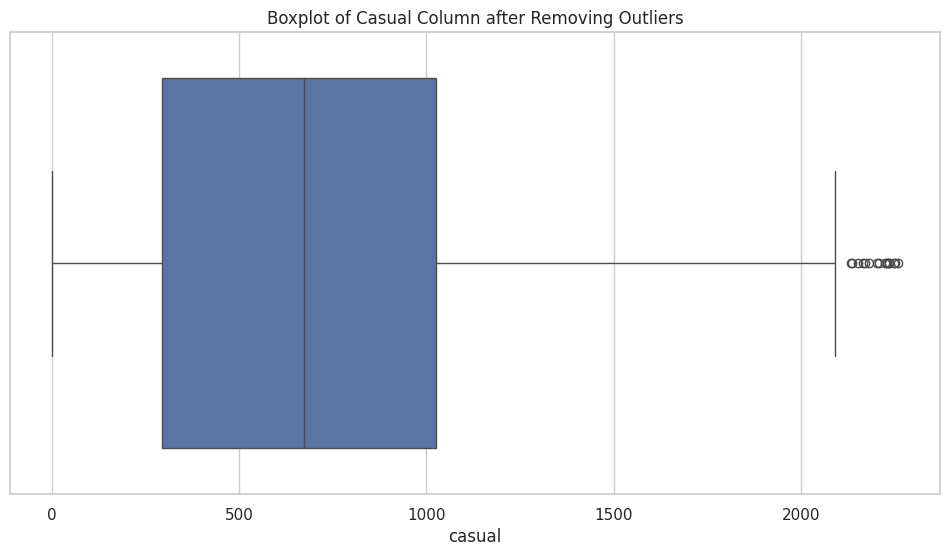

In [488]:
# Visualizing column casual using boxplot after removing the outliers
plt.figure(figsize = (12, 6))
sns.boxplot(x = days_df["casual"])
plt.title("Boxplot of Casual Column after Removing Outliers")
plt.show()

In [489]:
# Check the statistics of column casual in days_df after removing the outliers
days_df["casual"].describe()

count     687.000000
mean      732.010189
std       521.433756
min         2.000000
25%       295.000000
50%       674.000000
75%      1026.500000
max      2258.000000
Name: casual, dtype: float64

## Exploratory Data Analysis (EDA)

####1. Checking the trend of bike rentals for each hour from 2011 and 2012.

In [490]:
hours_df.groupby(by = ["hour"], observed = True).agg({
    "count": ["max", "min", "sum"]
})

count            
       max min     sum
hour                  
0      283   2   39130
1      168   1   24164
2      132   1   16352
3       79   1    8174
4       28   1    4428
5       66   1   14261
6      213   1   55132
7      474   1  120465
8      498   5  110311
9      426  14  157298
10     423   8   98911
11     462  10  104282
12     453   3  120974
13     456  11  119002
14     479  12  105382
15     484   7  115348
16     502  11  152691
17     508  15   84723
18     505  23  102734
19     503  11  149896
20     505  11  156634
21     398   6  124404
22     338   9   94784
23     256   2   63941

It can be seen that the highest total of bike rentals is at 09.00 while the lowest is at 04.00.

####2. Checking the trend of bike rentals for each day from 2011 and 2012.

In [491]:
days_df.groupby(by = ["weekday"], observed = True).agg({
    "count": ["max", "min", "mean", "sum"]
})

count                           
            max   min         mean     sum
weekday                                   
Saturday   7109   627  3698.555556  299583
Sunday     7333   605  3814.943820  339530
Monday     7525    22  4305.019417  443417
Tuesday    7767   683  4510.663462  469109
Wednesday  8173   441  4520.825243  465645
Thursday   7804   431  4667.259615  485395
Friday     8167  1167  4654.640777  479428

It can be seen that the highest total of bike rentals is on Thursday while the lowest is on Saturday.

####3. Checking the trend of bike rentals for each month from 2011 and 2012.

In [492]:
days_df.groupby(by = ["year", "month"], observed = True).agg({
    "count": ["max", "min", "sum"]
})

count              
                 max   min     sum
year month                        
2011 January    1985   431   38189
     February   2927  1005   48215
     March      3239   605   64045
     April      5312   795   94870
     May        5805  2633  131033
     June       5515  3767  143512
     July       5538  3285  124726
     August     5895  1115  136691
     September  5423  1842  122478
     October    5409   627  118000
     November   4486  1495  102167
     December   3940   705   87323
2012 January    4521  1301   96744
     February   5062  1529  103137
     March      6871  3194  142442
     April      7290  1027  140110
     May        7639  2843  146960
     June       7736  4127  150542
     July       8173  4459  181825
     August     7765  4549  199814
     September  8167  4073  164825
     October    8156    22  174934
     November   6536  2277  145812
     December   6606   441  123713

It can be seen that all months in 2012 has higher total of bike rentals than in 2011 for corresponding month.

####4. Checking the trend of bike rentals by categorizing into season where each season is categorized by the weather category from 2011 and 2012.

In [493]:
days_df.groupby(by = ["season", "weather_category"], observed = True).agg({
    "count": ["max", "min", "sum"]
})

count              
                             max   min     sum
season weather_category                       
Spring Misty/Cloudy         5892   605  147737
       Clear/Partly Cloudy  6312   431  312036
       Light Rain/Snow      2169   441    3739
Summer Misty/Cloudy         7001  1471  260575
       Clear/Partly Cloudy  7736  2028  514164
       Light Rain/Snow      1685   795    3507
Fall   Misty/Cloudy         7582  1115  213658
       Clear/Partly Cloudy  8173  3285  726803
       Light Rain/Snow      4459  1842   11007
Winter Misty/Cloudy         7572  1096  294658
       Clear/Partly Cloudy  8156  1495  474607
       Light Rain/Snow      4639    22   19616

It can be seen that during fall season, the total of bike rentals is higher among other seasons, followed by winter, summer, and spring season has the lowest total. In all seasons, during clear or partly cloudy, the total of bike rentals is the highest, while during light rain or snow, the total is the lowest.

#### 5. Checking the trend of bike rentals by categorizing into workingday for each year 2011 and 2012.

In [494]:
days_df.groupby(by = ["year", "workingday"], observed = True).agg({
    "count": ["max", "min", "sum"]
})

count               
                       max   min      sum
year workingday                          
2011 Workday          5805   605   354985
     Holiday/Weekend  5895   431   856264
2012 Workday          7333  1013   343074
     Holiday/Weekend  8173    22  1427784

It can be seen that the total of bike rentals is much higher during the holiday or weekend in both years.

#### 6. Checking how many people categorized into registered or casual users for each year.

In [495]:
days_df.groupby(by = ["year"], observed = True).agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,979035,232214
2012,1500181,270677


It can be seen that registered user is much higher than the casual user. Also, the total of registered user from 2011 to 2012 is increased a lot, while the total of casual user from 2011 to 2012 is increased slightly.

#### 7. Checking the correlation between temperature, humidity, windspeed, and count.

In [496]:
numerical_columns = ['temperature', 'humidity', 'windspeed', 'count']
correlation = days_df[numerical_columns].corr()
print(correlation)

             temperature  humidity  windspeed     count
temperature     1.000000  0.134474  -0.155860  0.630086
humidity        0.134474  1.000000  -0.252595 -0.086684
windspeed      -0.155860 -0.252595   1.000000 -0.246210
count           0.630086 -0.086684  -0.246210  1.000000


It can be seen that temperature has high correlation with count.

#### 8. Plotting a scatter plot for temperature with count, humidity with count, and windspeed with count.

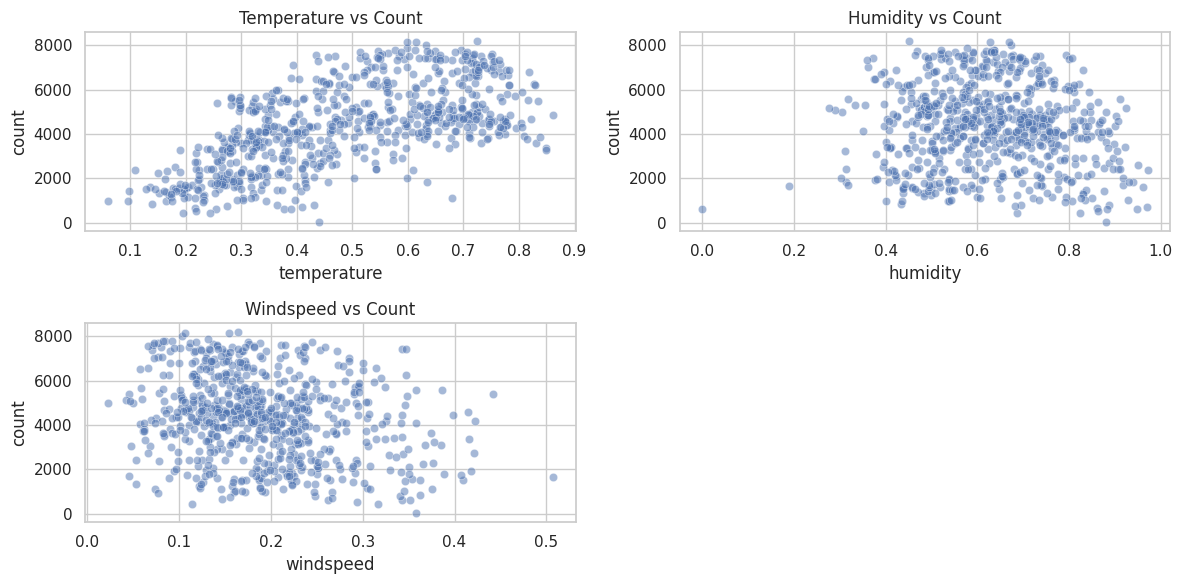

In [497]:
plt.figure(figsize=(12, 6))

# Scatter plot for temperature with count
plt.subplot(2, 2, 1)
sns.scatterplot(x = "temperature", y = "count", data = days_df, alpha = 0.5)
plt.title("Temperature vs Count")

# Scatter plot for humidity with count
plt.subplot(2, 2, 2)
sns.scatterplot(x = "humidity", y = "count", data = days_df, alpha = 0.5)
plt.title("Humidity vs Count")

# Scatter plot for windspeed with count
plt.subplot(2, 2, 3)
sns.scatterplot(x = "windspeed", y = "count", data = days_df, alpha = 0.5)
plt.title("Windspeed vs Count")

plt.tight_layout()
plt.show()

From the scatter plots above, it can be seen that temperature has positive correlation with count, windspeed has low negative correlation with count, and humidity has very low or even no correlation with count.

#### 9. RFM analysis on registered user.

RFM stands for Recency, Frequency, and Monetary.
- Recency means how recently has the customer made a transaction
- Frequency means how frequent is the customer in ordering/buying some product
- Monetary means how much does the customer spend on purchasing products

In [498]:
current_date = max(hours_df['date'])
rfm_df = hours_df.groupby('registered').agg({

    # This is recency
    'date': lambda a: (current_date - a.max()).days,

    # This is frequency
    'instant': 'count',

    # This is monetary
    'count': 'sum'
}).reset_index()

# Renaming column names
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head(10))

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602
5           5        2        287      1840
6           6        6        266      1992
7           7        1        200      1787
8           8        0        190      1968
9           9        0        178      2057


#### 10. Clustering total of bike rentals based on humidity level

In this analysis, we will multiply each of humidity data by 100. After that, we will use this indicator to cluster the humidity level.
- 0 $\leq$ x $\leq$ 45: Too dry
- 45 < x < 65: Ideal
- 65 $\leq$ x $\leq$ 100: Too humid

In [499]:
days_df['humidity'] = days_df['humidity'] * 100
hours_df['humidity'] = hours_df['humidity'] * 100

In [500]:
def classify_humidity(humidity):
    if humidity < 45:
      return "Too dry"
    elif humidity >= 45 and humidity < 65:
      return "Ideal"
    else:
      return "Too humid"

hours_df["humidity_category"] = hours_df["humidity"].apply(classify_humidity)
days_df["humidity_category"] = days_df["humidity"].apply(classify_humidity)

In [501]:
hours_df.groupby(by = "humidity_category").agg({
    "count": ["count"]})

,count
,count
humidity_category,
Ideal,4742
Too dry,2717
Too humid,7806


From the result, we can see that the total of bike rental is the highest when the level of humidity is too humid.

## Visualization & Explanatory Analysis

### Question 1: Which year shows better performance on the total of bike rentals? What can be inferred about bike rentals in both 2011 and 2012?

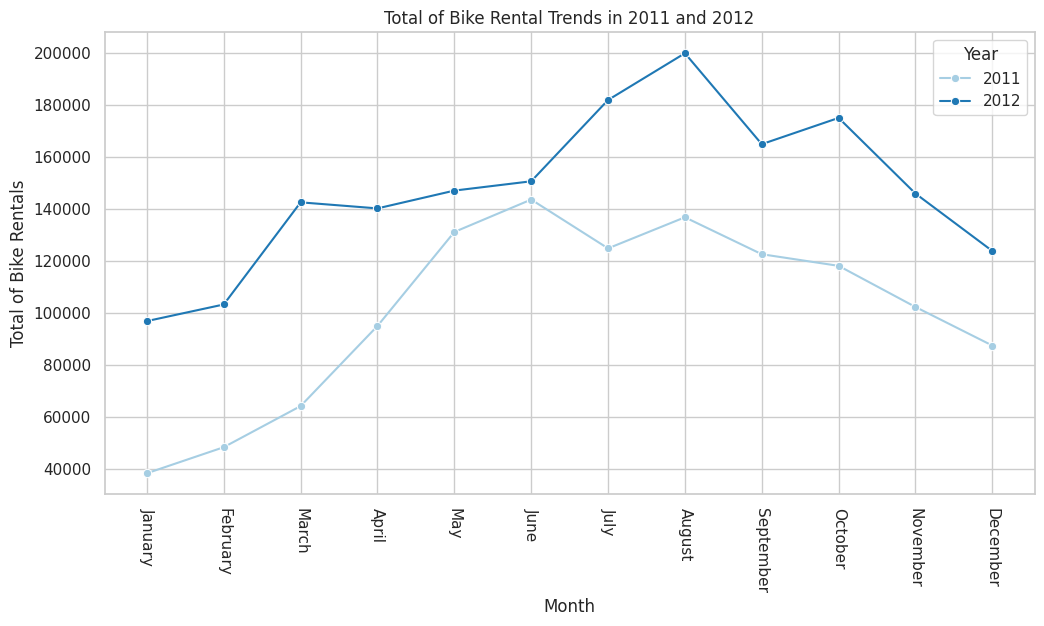

In [502]:
# Preparing the data for chart
days_df["month"] = pd.Categorical(days_df["month"], categories =
    ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    ordered = True)

monthly_counts = days_df.groupby(by = ["year", "month"]).agg({
    "count": "sum"
}).reset_index()

# Setting the style of the chart
sns.set(style = "whitegrid")
plt.figure(figsize = (12, 6))
sns.lineplot(data = monthly_counts, x = "month", y = "count", hue = "year", palette = "Paired", marker = "o")

# Adding a title
plt.title("Total of Bike Rental Trends in 2011 and 2012")

# Adding labels for x and y
plt.xlabel("Month")
plt.ylabel("Total of Bike Rentals")

# Adding a legend
plt.legend(title = "Year", loc = "upper right")

# Rotating the x label 90 degrees
plt.xticks(rotation = -90)

# Showing the line chart
plt.show()

From the chart above, it can be seen that 2012 has better performance than 2011 on any month. The total of bike rentals in 2012 is higher than 2011 on any month. In 2011, the performance is peaked at June, while in 2012, the performance is peaked at August.

### Question 2: What is the effect of weather to the total of bike rentals in both 2011 and 2012?

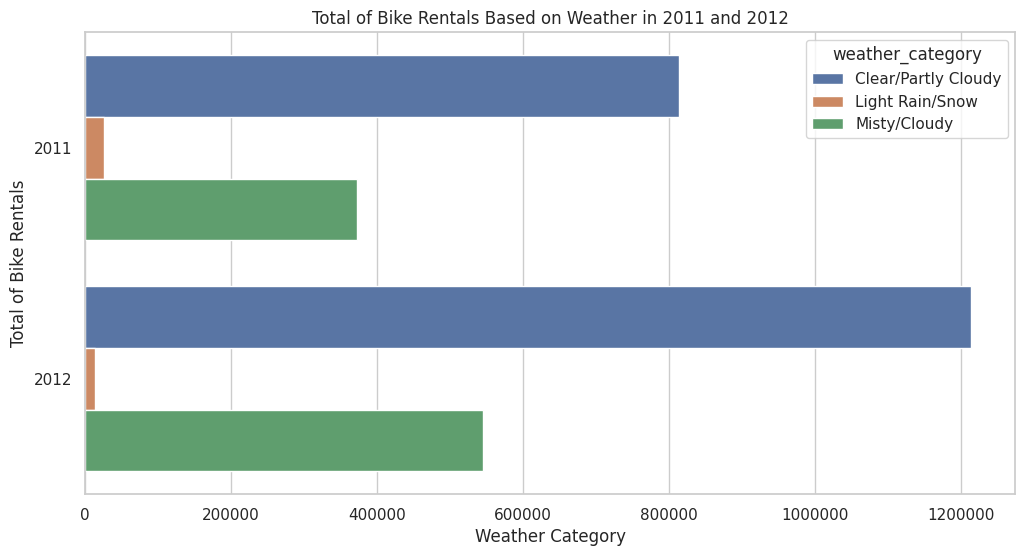

In [503]:
# Preparing the data for chart
days_df["weather_category"] = pd.Categorical(days_df["weather_category"], categories =
    ["Clear/Partly Cloudy", "Light Rain/Snow", "Misty/Cloudy"],
    ordered = True)

weather_category_counts = days_df.groupby(by = ["year", "weather_category"]).agg({
    "count": "sum"
}).reset_index()

# Setting the style of the chart
plt.figure(figsize=(12, 6))
sns.barplot(data = weather_category_counts, x = "count", y = "year", hue = "weather_category", errorbar = None)
plt.ticklabel_format(style = "plain", axis = "x")

# Adding a title
plt.title("Total of Bike Rentals Based on Weather in 2011 and 2012")

# Adding labels for x and y
plt.xlabel("Weather Category")
plt.ylabel("Total of Bike Rentals")

# Showing the bar plot
plt.show()

From the chart above, it can be seen that the highest total of bike rentals is when the weather is clear or partly cloudy while the lowest total of bike rentals is when the weather is light rain or snowy. This applies in both year.

### Question 3: What is the correlation among temperature, humidity, and windspeed with the total of bike rentals?

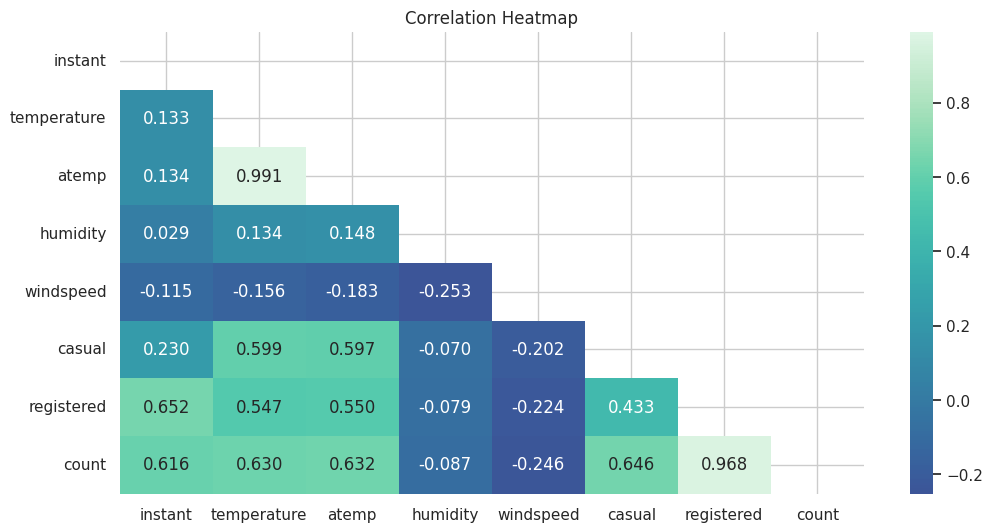

In [504]:
# Preparing the data with numeric only type for correlation
fig, ax = plt.subplots(figsize = (12,6))
correlation = days_df.corr(numeric_only = True)
mask = np.triu(np.ones_like(correlation, dtype = bool))

# Setting the style of the chart
sns.heatmap(correlation, annot = True, mask = mask, cmap = "mako", center = 0, fmt = ".3f")

# Adding labels for x and y
plt.title("Correlation Heatmap")

# Showing the heatmap
plt.show()

We can focus on 'count' row from the heatmap above. It can be seen that temperature has correlation coefficient of 0.630, humidity has correlation coefficient of -0.087, and windspeed has correlation coefficient of -0.246. This means that temperature has high positive correlation, humidity has very low negative correlation, and windspeed has low correlation with the total of bike rentals.

### Question 4: What season that has the highest and lowest total of bike rentals in both years?

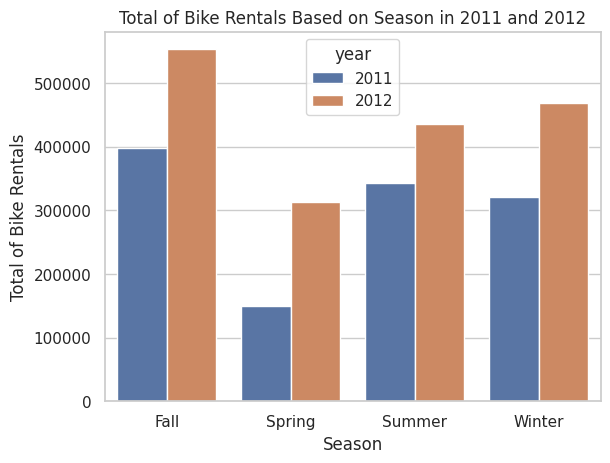

In [505]:
# Preparing the data for chart
days_df["season"] = pd.Categorical(days_df["season"], categories =
    ["Fall", "Spring", "Summer", "Winter"],
    ordered = True)

season_counts = days_df.groupby(by = ["year", "season"]).agg({
    "count": "sum"
}).reset_index()

# Setting the style of the chart
sns.barplot(data = season_counts, x = "season", y = "count", hue = "year", errorbar = None)

# Adding a title
plt.title("Total of Bike Rentals Based on Season in 2011 and 2012")

# Adding labels for x and y
plt.xlabel("Season")
plt.ylabel("Total of Bike Rentals")

# Showing the bar plot
plt.show()

From the chart above, it can be seen during the fall season, the total of bike rentals is the highest among other seasons while during the spring season, the total of bike rentals is the lowest among other seasons. This applies in both year.

### Question 5: What is the comparison between casual and registered user in the total of bike rentals?

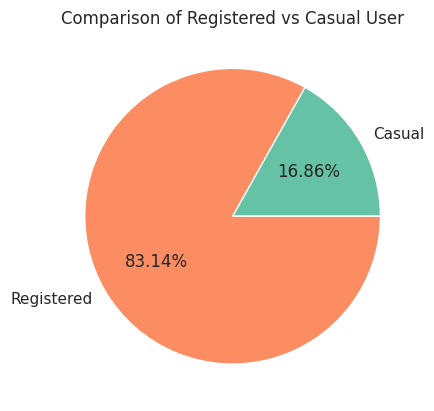

In [506]:
# Setting up data for pie plot
data = [sum(days_df["casual"]), sum(days_df["registered"])]
label = ['Casual', 'Registered']

# Setting the style of pie plot
plt.pie(data, labels = label, autopct = '%1.2f%%', colors = sns.color_palette("Set2"))

# Adding a title
plt.title("Comparison of Registered vs Casual User")

# Showing the pie plot
plt.show()

From the chart above, it can be seen that people with registered user has reached 83.14% from total, while 16.86% is the people with casual (not registered) user.

### Question 6: How do the days among weekdays, weekend, and holiday affect the total of bike rentals?

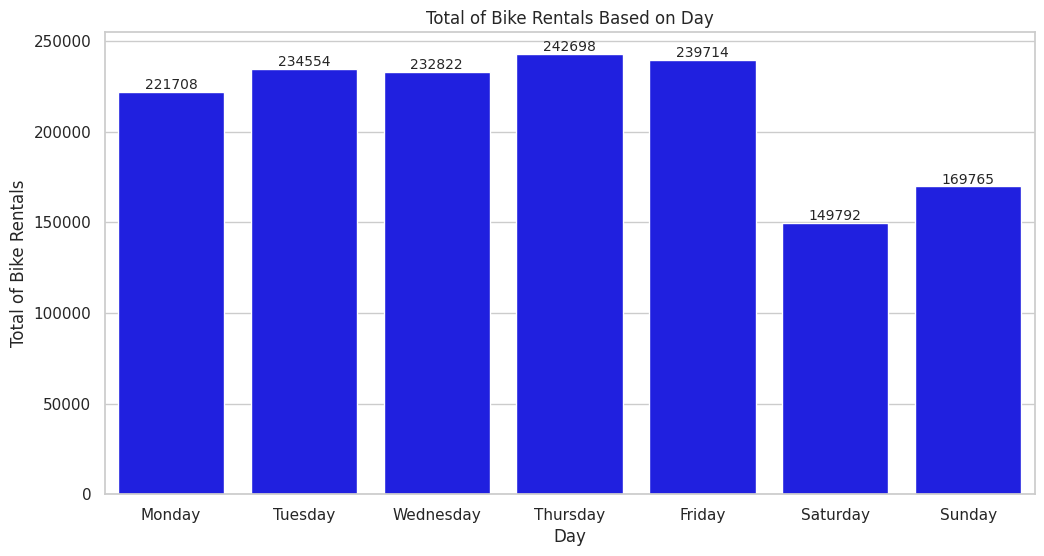

In [507]:
# Preparing the data for chart
days_df["weekday"] = pd.Categorical(days_df["weekday"], categories =
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    ordered = True)

weekday_counts = days_df.groupby(by = ["year", "weekday"]).agg({
    "count": "sum"
}).reset_index()

# Setting the style for bar plot
sns.set(style = "whitegrid")
plt.figure(figsize = (12, 6))
figure = sns.barplot(data = weekday_counts, x = "weekday", y = "count", color = "blue", errorbar = None)

# Setting the label to be above the bar
figure.bar_label(figure.containers[0], fontsize = 10)

# Adding a title
plt.title("Total of Bike Rentals Based on Day")

# Adding labels for x and y
plt.xlabel("Day")
plt.ylabel("Total of Bike Rentals")

# Showing the bar plot
plt.show()

Let's say that weekdays are Monday until Friday, while weekends are Saturday and Sunday. From the chart above, it can be seen that during weekends, both of the total of bike rentals are lower than during weekdays. The highest total of bike rentals is on Thursday, which is in weekdays while the lowest total of bike rentals is on Saturday, which is in weekends.

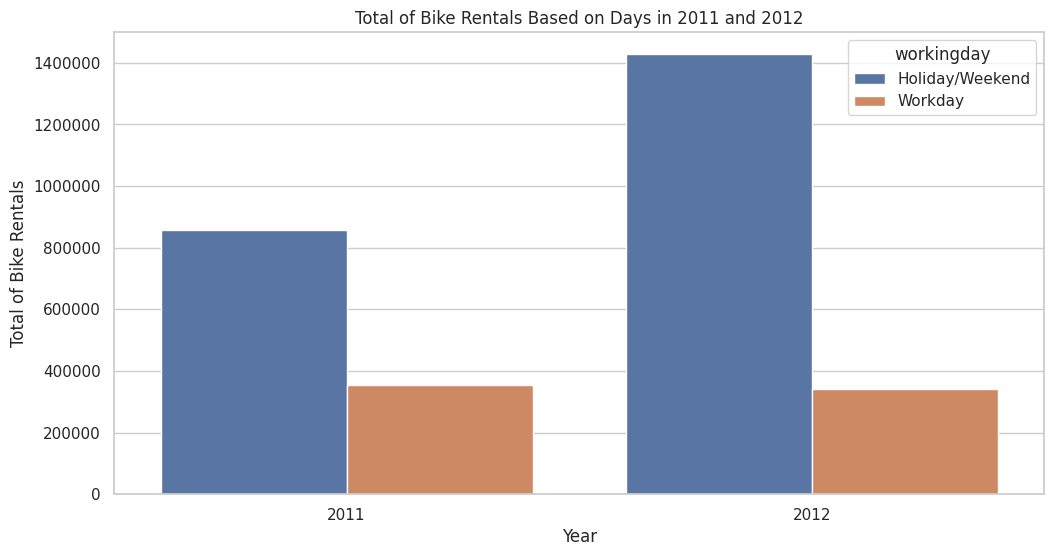

In [508]:
# Preparing the data for chart
days_df["workingday"] = pd.Categorical(days_df["workingday"], categories =
    ["Holiday/Weekend", "Workday"],
    ordered = True)

workingday_counts = days_df.groupby(by = ["year", "workingday"]).agg({
    "count": "sum"
}).reset_index()

# Setting the style of the chart
plt.figure(figsize = (12, 6))
sns.barplot(data = workingday_counts, x = "year", y = "count", hue = "workingday", errorbar = None)
plt.ticklabel_format(style = "plain", axis = "y")

# Adding a title
plt.title("Total of Bike Rentals Based on Days in 2011 and 2012")

# Adding labels for x and y
plt.xlabel("Year")
plt.ylabel("Total of Bike Rentals")

# Showing the bar plot
plt.show()

Now let's look at another chart. From the chart above, it can be seen that if we categorized it by workingday, the total of bike rentals is much higher during the holiday or weekend instead of during workday in both years.

## Conclusion

1. Conclusion 1: In 2012, the performance of bike rentals is much better than in 2011 on any month. The total of bike rentals in 2012 is higher than 2011 on any month. In 2011, the performance is peaked at June, while in 2012, the performance is peaked at August.

2. Conclusion 2: In both 2011 and 2012, when the weather is nice to go outside (such as during clear or partly cloudy), the total of bike rentals reach the highest number while when the weather is not nice to go outside (such as during rain or snowy), the total of bike rentals is the lowest number among other weather conditions.

3. Conclusion 3: Correlating the total of bike rentals with temperature, humidity, and windspeed, we can conclude that temperature has high positive correlation which is 0.630, humidity has very low negative correlation which is -0.087, and windspeed has low correlation which is -0.246.

4. Conclusion 4: During the fall season, the total of bike rentals is the highest among other seasons while during the spring season, the total of bike rentals is the lowest among other seasons. This applies in both year.

5. Conclusion 5: From the total of bike rentals, people with registered user has reached 83.14% from total, while 16.86% is the people with casual (not registered) user.

6. Conclusion 6: During weekends, both days have lower total of bike rentals than during weekdays. The highest total of bike rentals is on Thursday, which is in weekdays while the lowest total of bike rentals is on Saturday, which is in weekends. If we categorized by workingday, the total of bike rentals is much higher during the holiday or weekend instead of during workday in both years.